In [133]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [134]:
df = pd.read_csv("Diabetes_prediction.csv")
df

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,Female,80.0,0,1,never,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,Male,28.0,0,0,never,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,Female,36.0,0,0,current,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,William Chun,PT100096,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Antoinette L Wells,PT100097,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Richard D Swart,PT100098,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Vivian Chu,PT100099,Female,24.0,0,0,never,35.42,4.0,100,0


In [135]:
df.head()

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,Female,80.0,0,1,never,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,Male,28.0,0,0,never,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,Female,36.0,0,0,current,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,Male,76.0,1,1,current,20.14,4.8,155,0


In [136]:
df.tail()

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,William Chun,PT100096,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Antoinette L Wells,PT100097,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Richard D Swart,PT100098,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Vivian Chu,PT100099,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Savitree Satram,PT100100,Female,57.0,0,0,current,22.43,6.6,90,0


#### DATA WRANGLING 

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EmployeeName         100000 non-null  object 
 1   Patient_id           100000 non-null  object 
 2   gender               100000 non-null  object 
 3   age                  100000 non-null  float64
 4   hypertension         100000 non-null  int64  
 5   heart_disease        100000 non-null  int64  
 6   smoking_history      100000 non-null  object 
 7   bmi                  100000 non-null  float64
 8   HbA1c_level          100000 non-null  float64
 9   blood_glucose_level  100000 non-null  int64  
 10  diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 8.4+ MB


In [138]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [139]:
df.isnull().sum()

EmployeeName           0
Patient_id             0
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [140]:
df.shape

(100000, 11)

In [141]:
df.dtypes

EmployeeName            object
Patient_id              object
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [142]:
df['age'] = df['age'].astype(int)

In [143]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [144]:
df["gender"].replace(["Female", "Male", "Other"], [0,1,-1], inplace=True)
df

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,0,80,0,1,never,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,0,54,0,0,No Info,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,1,28,0,0,never,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,0,36,0,0,current,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,1,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,William Chun,PT100096,0,80,0,0,No Info,27.32,6.2,90,0
99996,Antoinette L Wells,PT100097,0,2,0,0,No Info,17.37,6.5,100,0
99997,Richard D Swart,PT100098,1,66,0,0,former,27.83,5.7,155,0
99998,Vivian Chu,PT100099,0,24,0,0,never,35.42,4.0,100,0


In [145]:
df["smoking_history"].replace(["No Info", "never", "former", "current", "not current", "ever"], [1,2,3,4,5,6], inplace=True)
df

,EmployeeName,Patient_id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NATHANIEL FORD,PT101,0,80,0,1,2,25.19,6.6,140,0
1,GARY JIMENEZ,PT102,0,54,0,0,1,27.32,6.6,80,0
2,ALBERT PARDINI,PT103,1,28,0,0,2,27.32,5.7,158,0
3,CHRISTOPHER CHONG,PT104,0,36,0,0,4,23.45,5.0,155,0
4,PATRICK GARDNER,PT105,1,76,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,William Chun,PT100096,0,80,0,0,1,27.32,6.2,90,0
99996,Antoinette L Wells,PT100097,0,2,0,0,1,17.37,6.5,100,0
99997,Richard D Swart,PT100098,1,66,0,0,3,27.83,5.7,155,0
99998,Vivian Chu,PT100099,0,24,0,0,2,35.42,4.0,100,0


In [146]:
df["smoking_history"].nunique()

6

In [147]:
df["smoking_history"].value_counts()

smoking_history
1    35816
2    35095
3     9352
4     9286
5     6447
6     4004
Name: count, dtype: int64

In [148]:
df.drop(columns=["EmployeeName", "Patient_id"], inplace=True)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90,0
99996,0,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,2,35.42,4.0,100,0


#### CHECKING CATEGORY COUNT

In [149]:
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

#### REMOVING OUTLIERS

In [150]:
q1 = np.percentile(df["bmi"], 25, interpolation="midpoint")
q1

C:\Users\ATHARVA GOLE\AppData\Local\Temp\ipykernel_6584\654779678.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



23.63

In [151]:
q3 = np.percentile(df["bmi"], 75, interpolation="midpoint")
q3

C:\Users\ATHARVA GOLE\AppData\Local\Temp\ipykernel_6584\939338777.py:1: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)



29.58

In [152]:
IQR = q3 - q1
IQR

5.949999999999999

In [153]:
lower = np.where(df["bmi"] <= (q1-1.5*IQR))
lower

(array([   24,   155,   221, ..., 99841, 99906, 99933], dtype=int64),)

In [154]:
upper = np.where(df["bmi"] >= (q3+1.5*IQR))
upper

(array([   11,    39,    59, ..., 99953, 99960, 99993], dtype=int64),)

In [155]:
df.drop(upper[0] , inplace = True)
df.drop(lower[0] , inplace = True)

In [156]:
df.shape

(92914, 9)

In [157]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,92914.000000,92914.000000,92914.00000,92914.000000,92914.000000,92914.000000,92914.000000,92914.000000,92914.000000
mean,0.420647,41.956971,0.07028,0.039068,2.265837,26.400779,5.514219,137.495426,0.075575
std,0.494036,22.645849,0.25562,0.193759,1.402981,4.892598,1.061857,40.080111,0.264319
min,-1.000000,0.000000,0.00000,0.000000,1.000000,14.710000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,1.000000,23.480000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,2.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,3.000000,28.440000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.00000,1.000000,6.000000,38.500000,9.000000,300.000000,1.000000


In [158]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90,0
99996,0,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,2,35.42,4.0,100,0


#### DESCRIPTIVE STATISTICS

In [159]:
df["blood_glucose_level"].count()

92914

In [160]:
df["blood_glucose_level"].min()

80

In [161]:
df["blood_glucose_level"].max()

300

In [162]:
df["blood_glucose_level"].mean()

137.49542587769335

In [163]:
df["blood_glucose_level"].median()

140.0

In [164]:
df["blood_glucose_level"].mode()

0    130
Name: blood_glucose_level, dtype: int64

In [165]:
df["blood_glucose_level"].std()

40.0801112677367

In [166]:
df.groupby(['smoking_history' , 'age']).count()

gender  hypertension  heart_disease  bmi  HbA1c_level  \
smoking_history age                                                          
1               0       659           659            659  659          659   
                1       962           962            962  962          962   
                2       955           955            955  955          955   
                3       814           814            814  814          814   
                4       736           736            736  736          736   
...                     ...           ...            ...  ...          ...   
6               76       33            33             33   33           33   
                77       30            30             30   30           30   
                78       26            26             26   26           26   
                79       20            20             20   20           20   
                80      189           189            189  189          189   

                     blood_glucose_level  diabetes  
smoking_history age                                 
1               0                    659       659  
                1                    962       962  
                2                    955       955  
                3                    814       814  
                4                    736       736  
...                                  ...       ...  
6               76                    33        33  
                77                    30        30  
                78                    26        26  
                79                    20        20  
                80                   189       189  

[460 rows x 7 columns]

In [167]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90,0
99996,0,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,2,35.42,4.0,100,0


#### MODEL TRAINING

In [168]:
x = df[["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level"]]
y = df["diabetes"]

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [170]:
standardized_data = scaler.transform(x)
x = standardized_data

In [171]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 92914, dtype: int64

In [172]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y, random_state=2)

In [173]:
x_train.shape, x_test.shape

((65039, 8), (27875, 8))

In [174]:
# x_train

### NAIVE BAYES

In [175]:
from sklearn.naive_bayes import GaussianNB

In [176]:
model = GaussianNB()

In [177]:
model.fit(x_train, y_train)

GaussianNB()

In [178]:
x_test_prediction = model.predict(x_test)

In [179]:
x_train_prediction = model.predict(x_train)

In [180]:
y_test

23307    0
35510    0
94330    0
11440    0
98763    1
        ..
74100    0
14896    0
84701    0
21677    0
23341    0
Name: diabetes, Length: 27875, dtype: int64

In [181]:
model.score(x_test, y_test)

0.907085201793722

#### TEST ACCURACY 

In [182]:
model = model.score(x_test,y_test)
print("Naive Bayes' Test Accuracy = ", model*100,"%")

Naive Bayes' Test Accuracy =  90.7085201793722 %


#### TRAINING ACCURACY

In [183]:
accuracy = accuracy_score(x_train_prediction, y_train)
print("Naive Bayes' Training Accuracy = ", accuracy*100,"%")

Naive Bayes' Training Accuracy =  90.6210120081797 %


#### CONFUSION MATRIX

In [184]:
from sklearn.metrics import confusion_matrix

In [185]:
cf = confusion_matrix(y_test, x_test_prediction)
print(cf)

[[23941  1827]
 [  763  1344]]


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

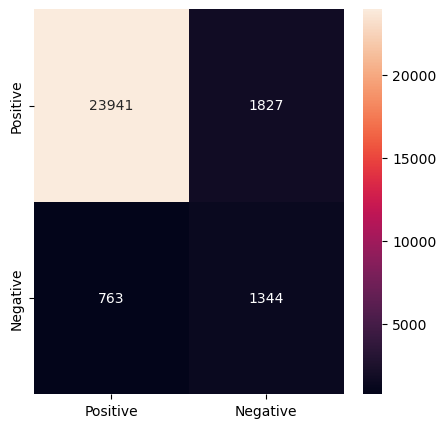

In [187]:
plt.figure(figsize=(5,5))
sns.heatmap(cf, annot=True, fmt="d", xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.show()

In [188]:
TP = 23959
TN = 1830
FP = 752
FN = 1334
total = TP+TN+FP+FN

In [189]:
Accuracy = (TP + TN)/(total)
print("Accuracy of the model = ",Accuracy*100,'%')

Accuracy of the model =  92.51659192825113 %


In [190]:
Precision = (TP)/(TP+FP)
print("Precision = ", Precision*100,'%')

Precision =  96.95682084901462 %


In [191]:
Recall = (TP)/(TP+FN) 
print("Recall = ", Recall*100,'%')

Recall =  94.72581346617642 %


In [192]:
Error =(FP+FN)/(total)
print("Error Rate = ",Error*100,"%")

Error Rate =  7.483408071748879 %


#### VISUALIZATION

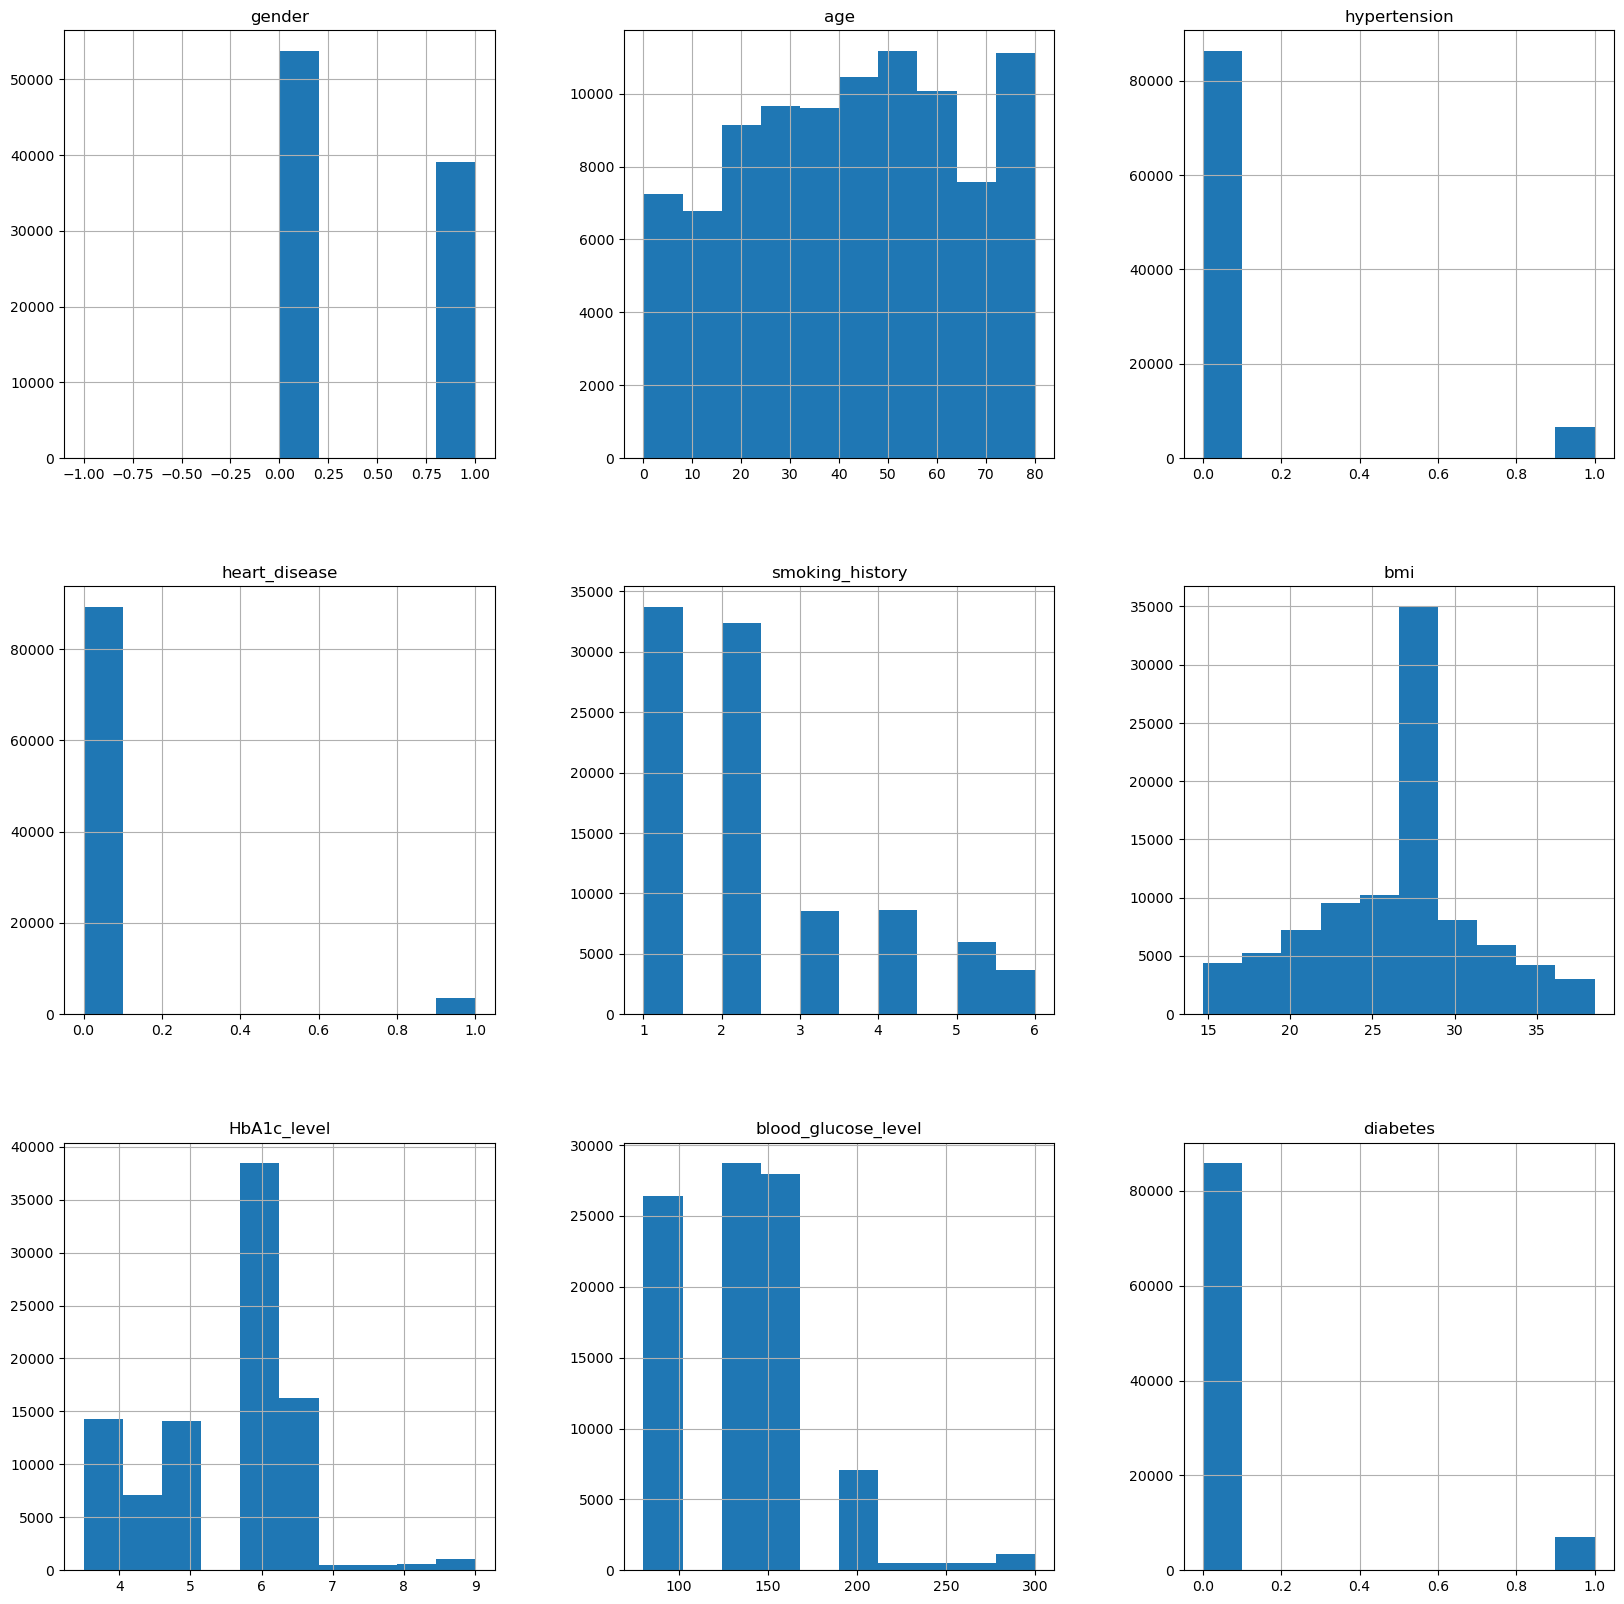

In [193]:
histogram = df.hist(figsize=(20,20))



#### CORRELATION HEATMAP

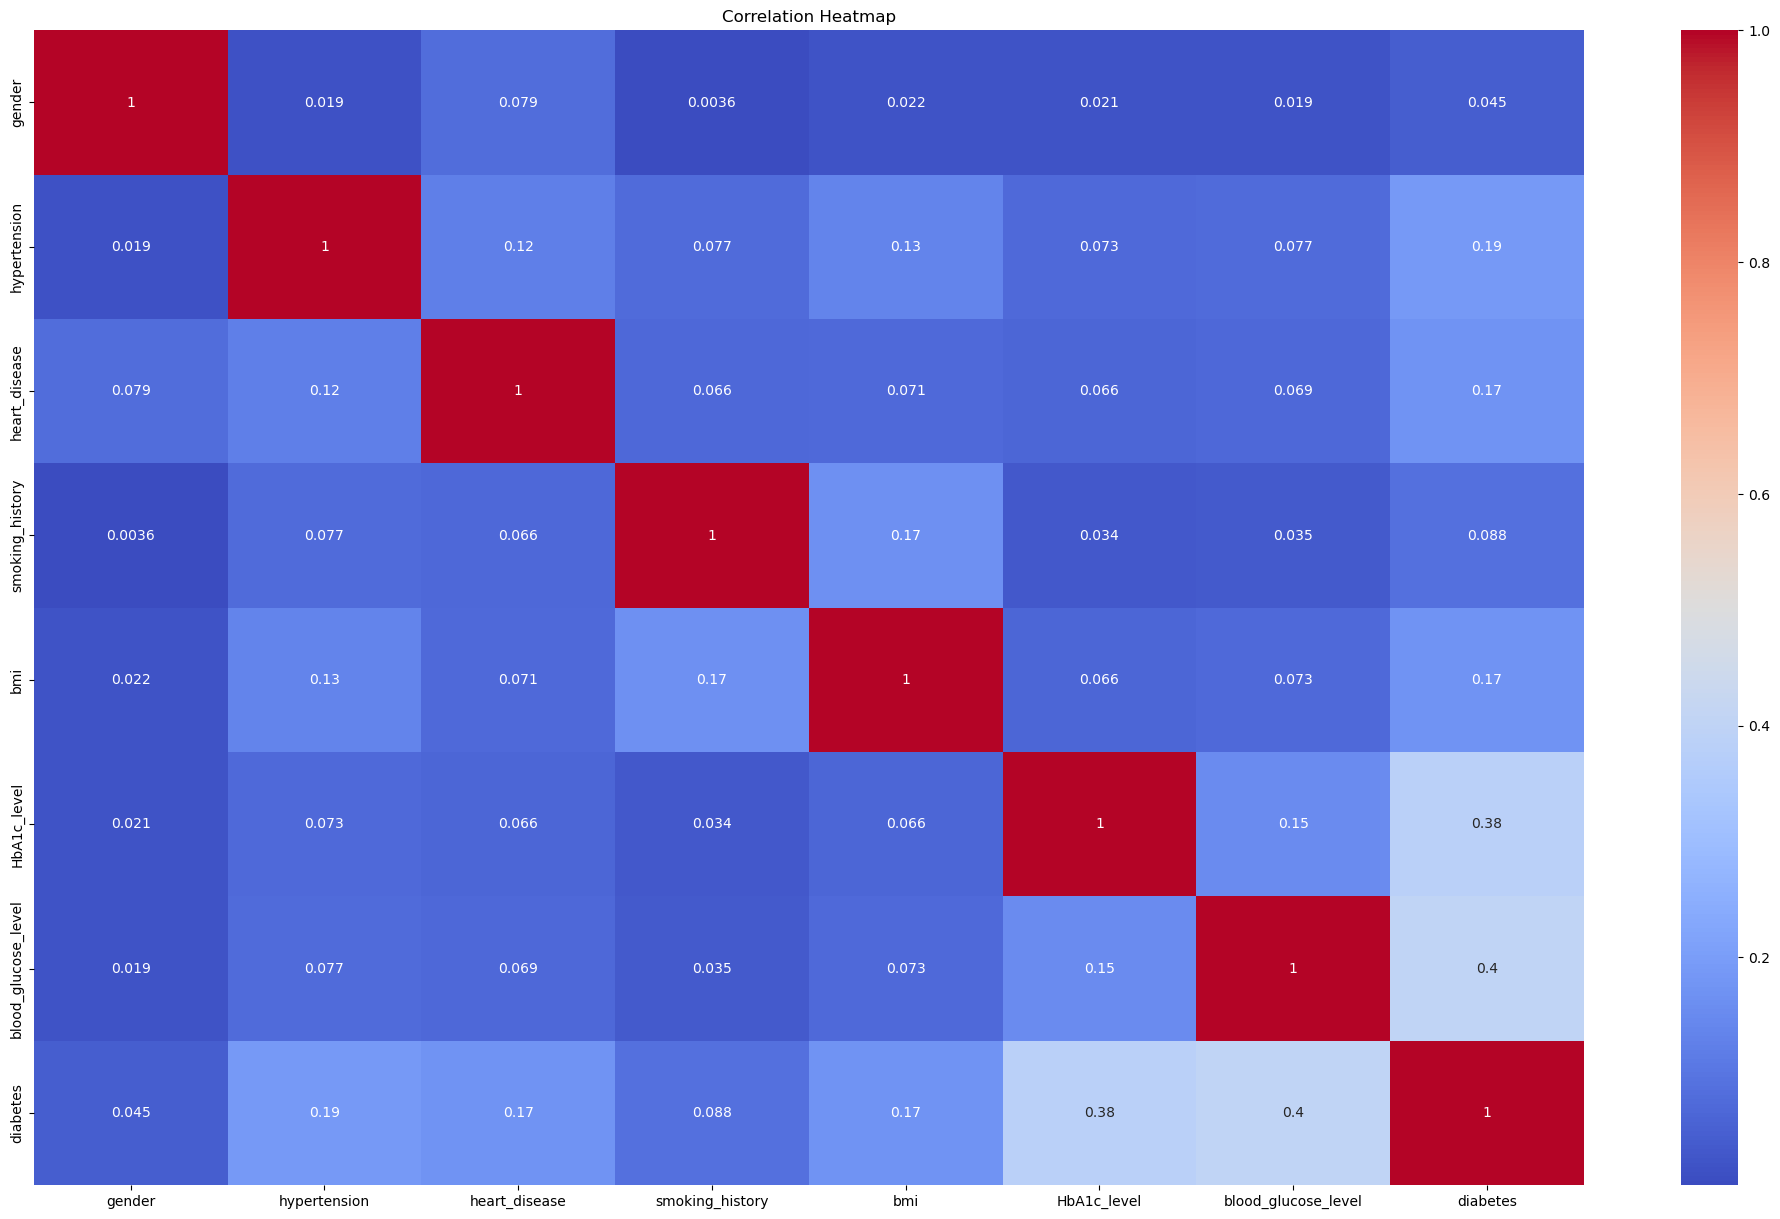

In [194]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [195]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,2,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,2,27.32,5.7,158,0
3,0,36,0,0,4,23.45,5.0,155,0
4,1,76,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90,0
99996,0,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,2,35.42,4.0,100,0


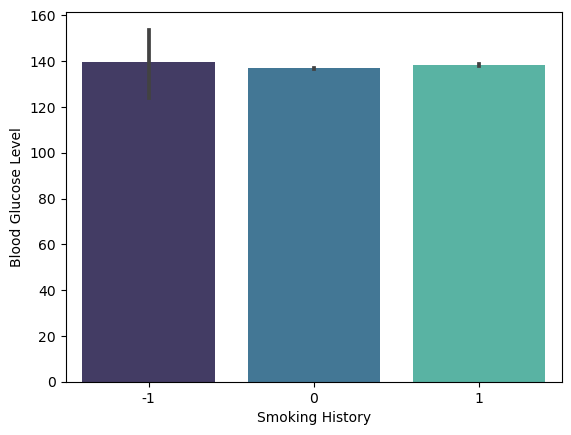

In [196]:
sns.barplot(x='gender', y='blood_glucose_level', data=df, palette='mako')
plt.xlabel('Smoking History')
plt.ylabel('Blood Glucose Level')
plt.show()

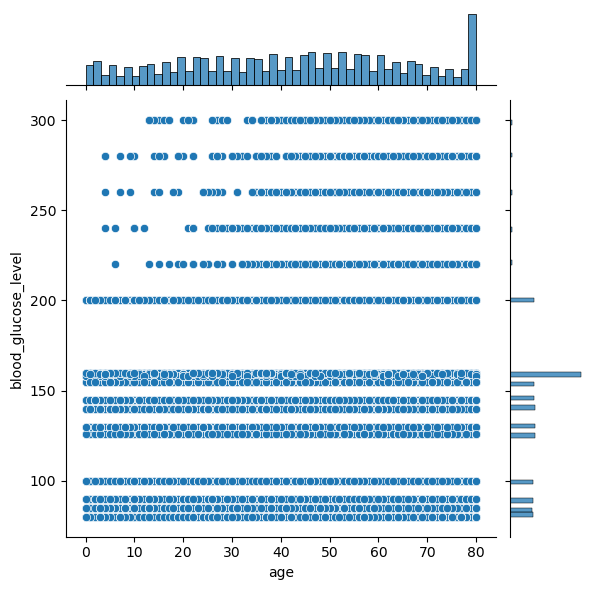

In [197]:
sns.jointplot(x = "age", y = "blood_glucose_level", data = df)

C:\Users\ATHARVA GOLE\AppData\Local\Temp\ipykernel_6584\1066041020.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='blood_glucose_level', ylabel='Density'>

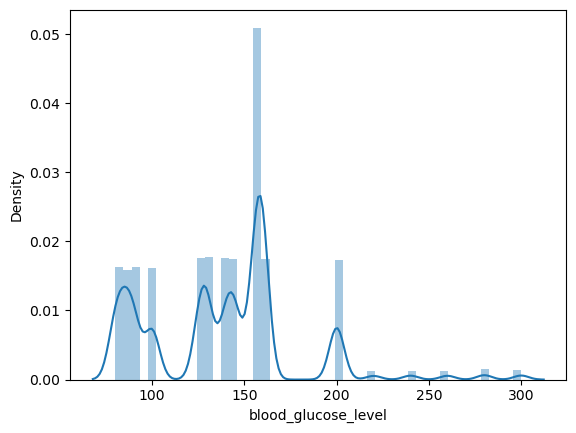

In [198]:
sns.distplot(df["blood_glucose_level"])

C:\Users\ATHARVA GOLE\AppData\Local\Temp\ipykernel_6584\3224034383.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='blood_glucose_level'>

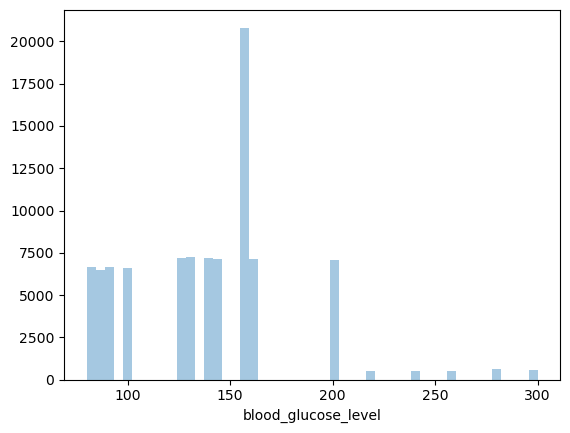

In [199]:
sns.distplot(df["blood_glucose_level"], kde=False)

In [200]:
temp = df["blood_glucose_level"].value_counts()
label = df['blood_glucose_level'].unique()
label

array([140,  80, 158, 155,  85, 200, 145, 100, 130, 160, 126, 159,  90,
       260, 220, 300, 280, 240], dtype=int64)

In [201]:
plt.figure(figsize=(25, 25))
fig = go.Figure(data=[go.Pie(labels=label, values=temp, hole=.5)])
fig.show()

<Figure size 2500x2500 with 0 Axes>

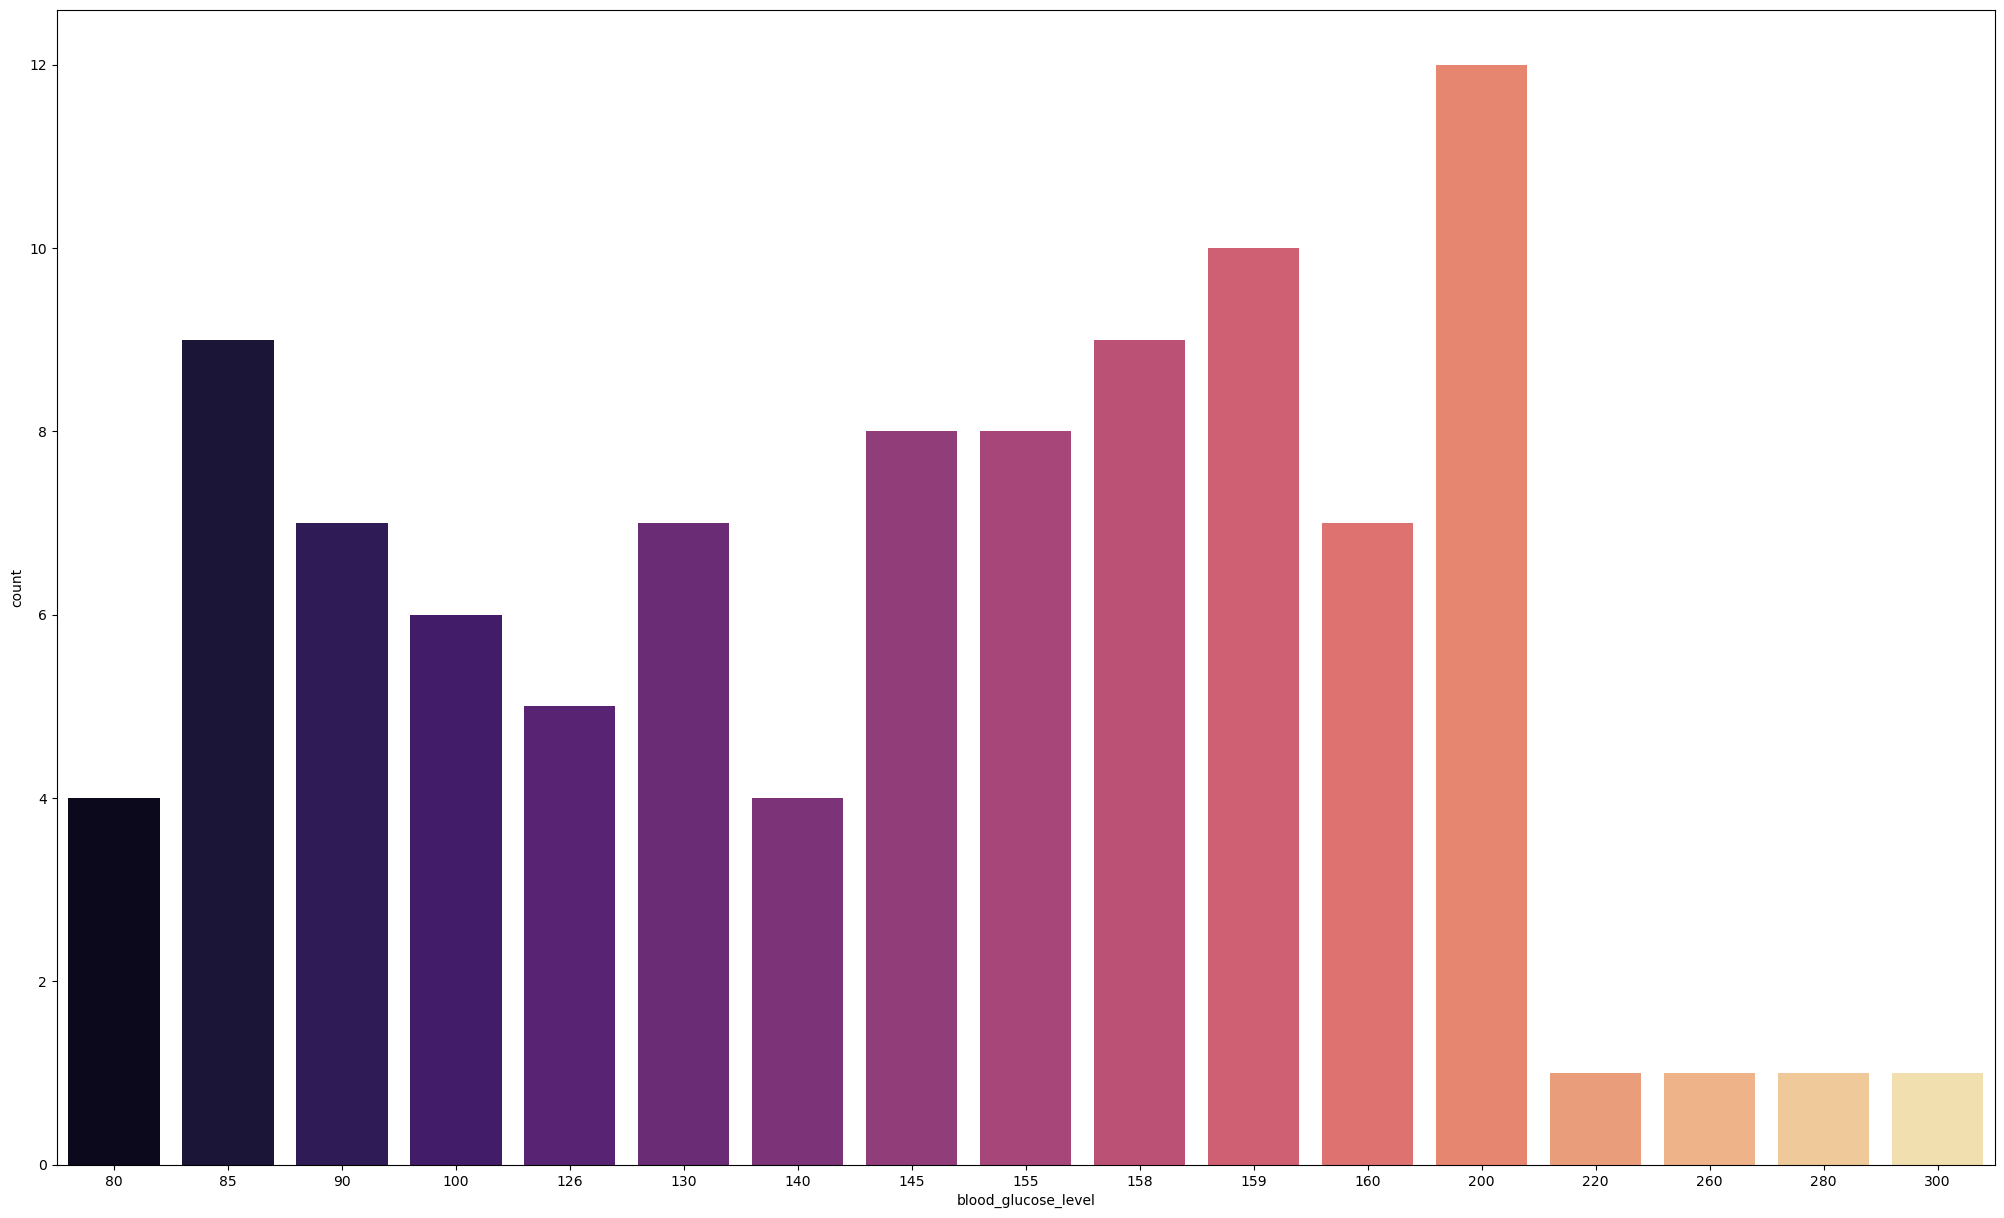

In [202]:
plt.figure(figsize=(25, 15))
sns.countplot(x='blood_glucose_level', data=df[:100], palette='magma')
plt.show()

C:\Users\ATHARVA GOLE\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



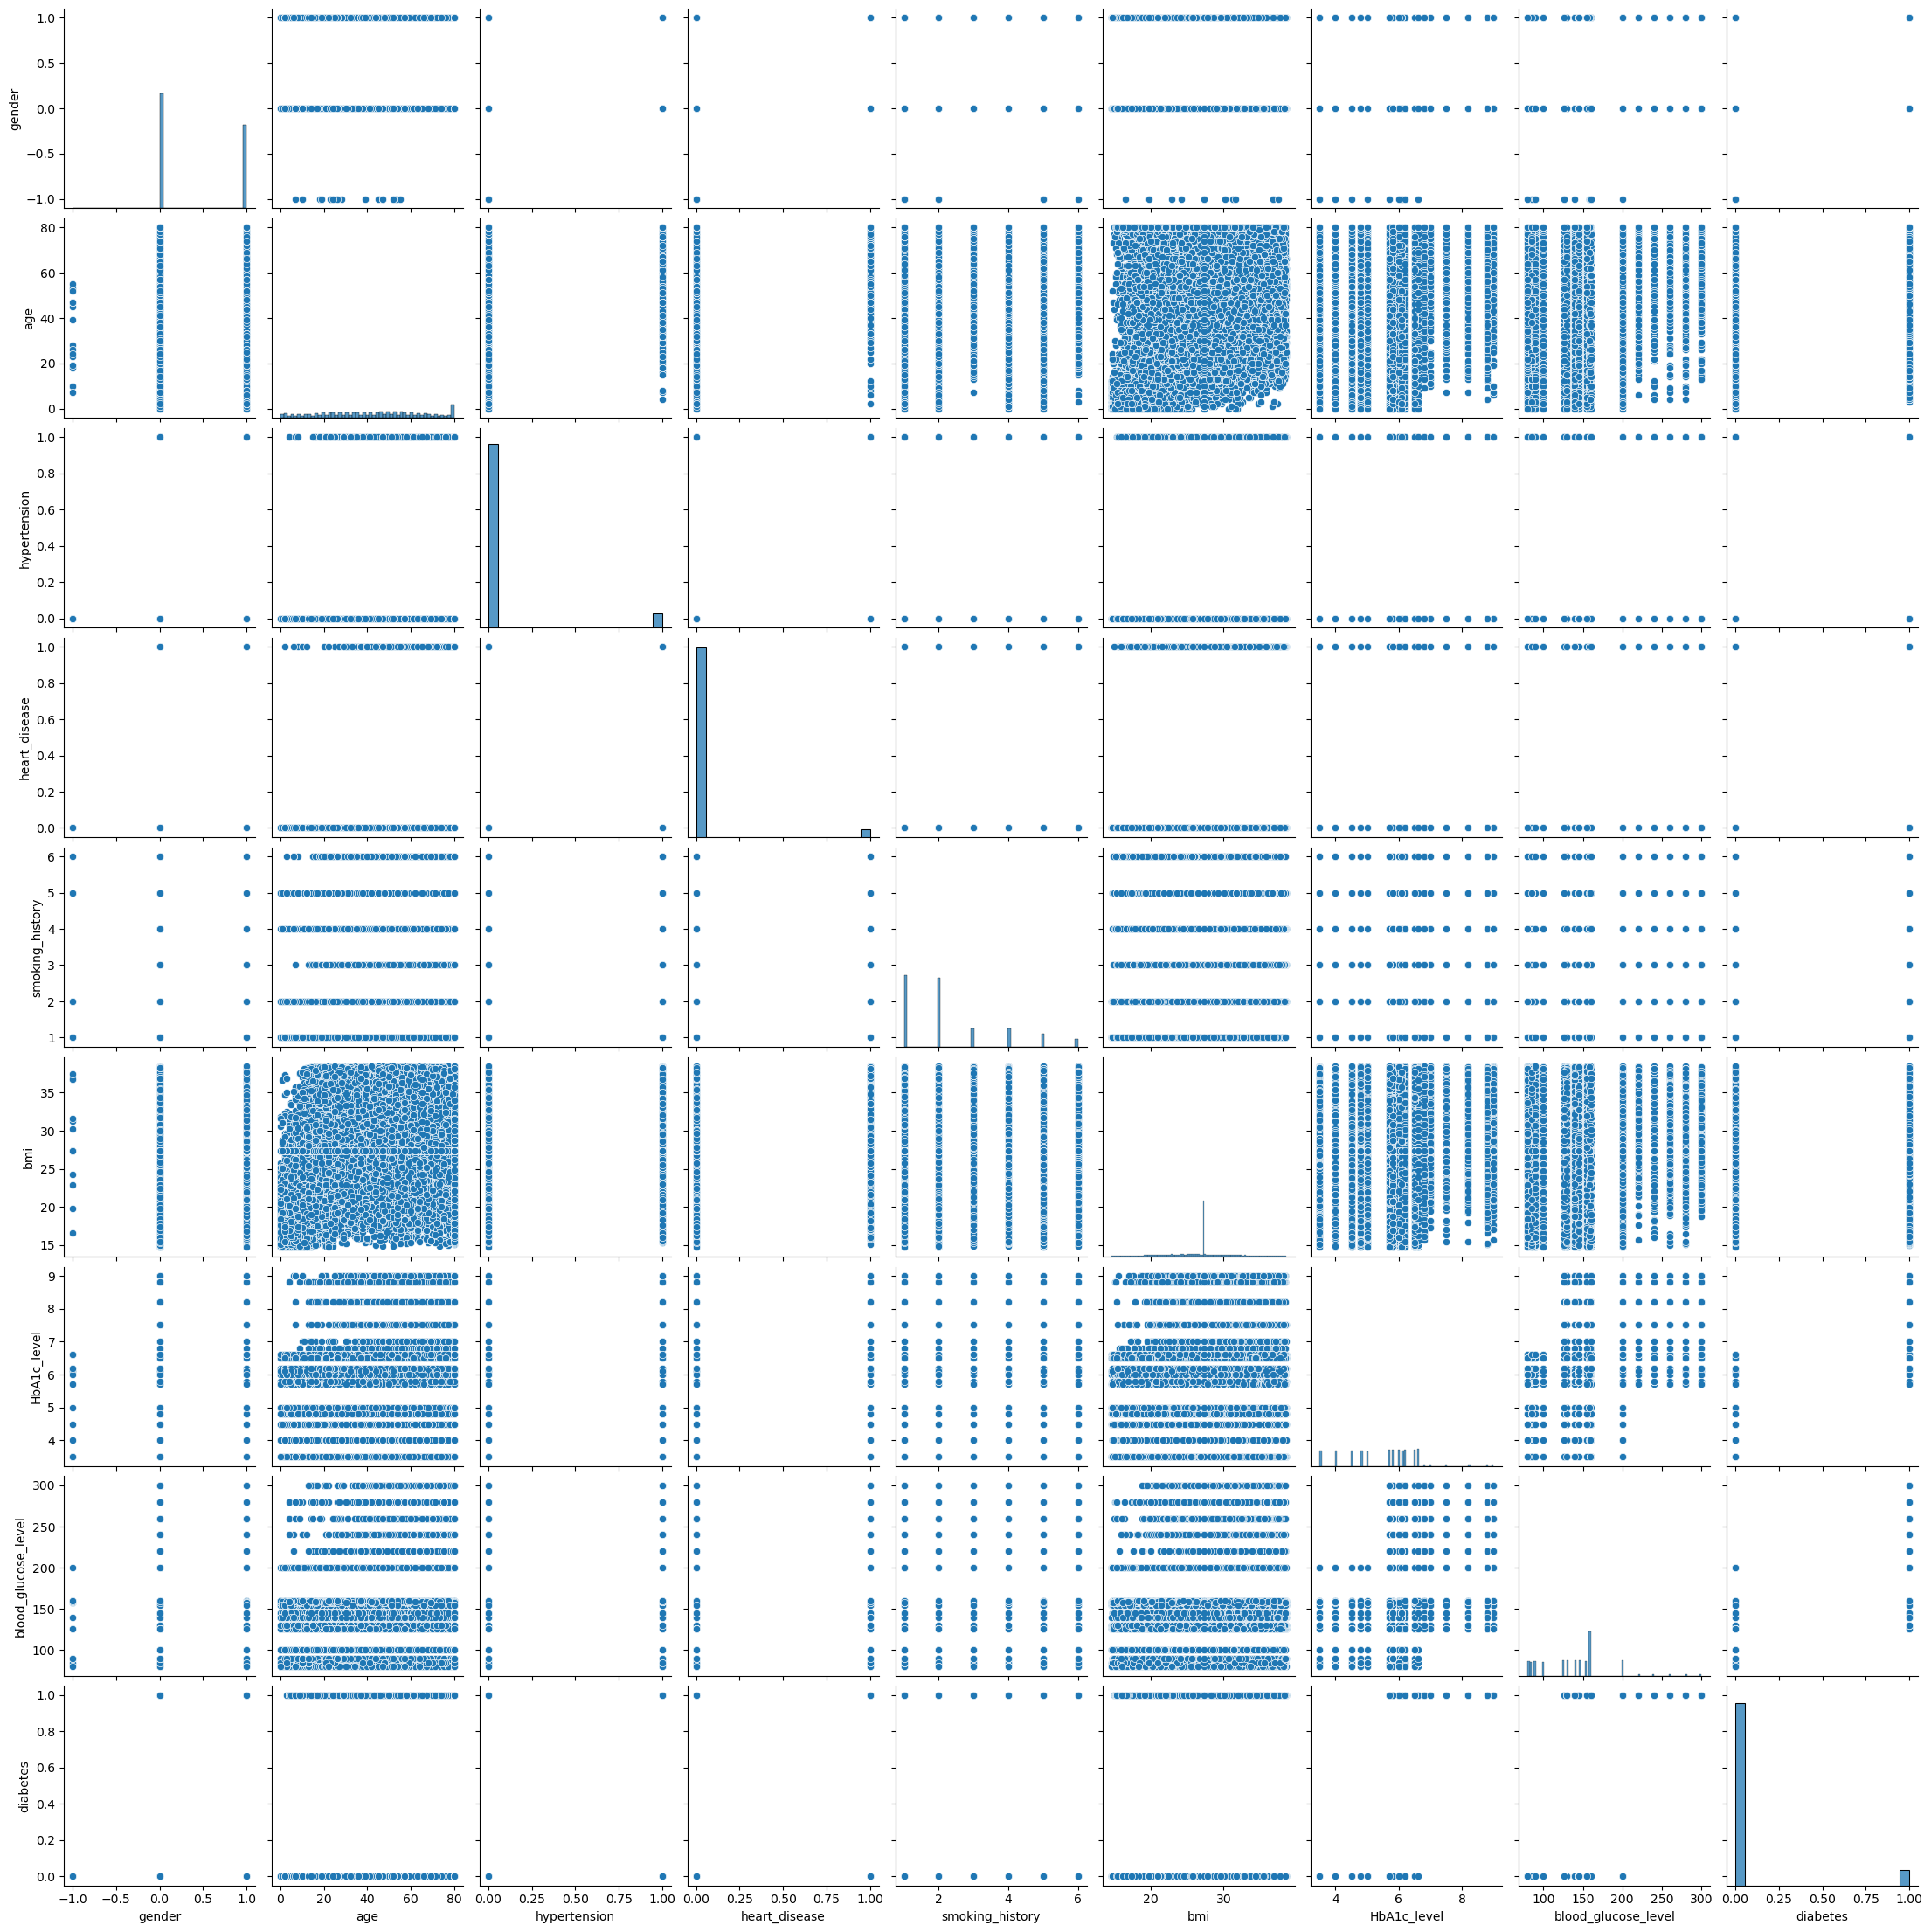

In [203]:
sns.pairplot(df)

In [204]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: >

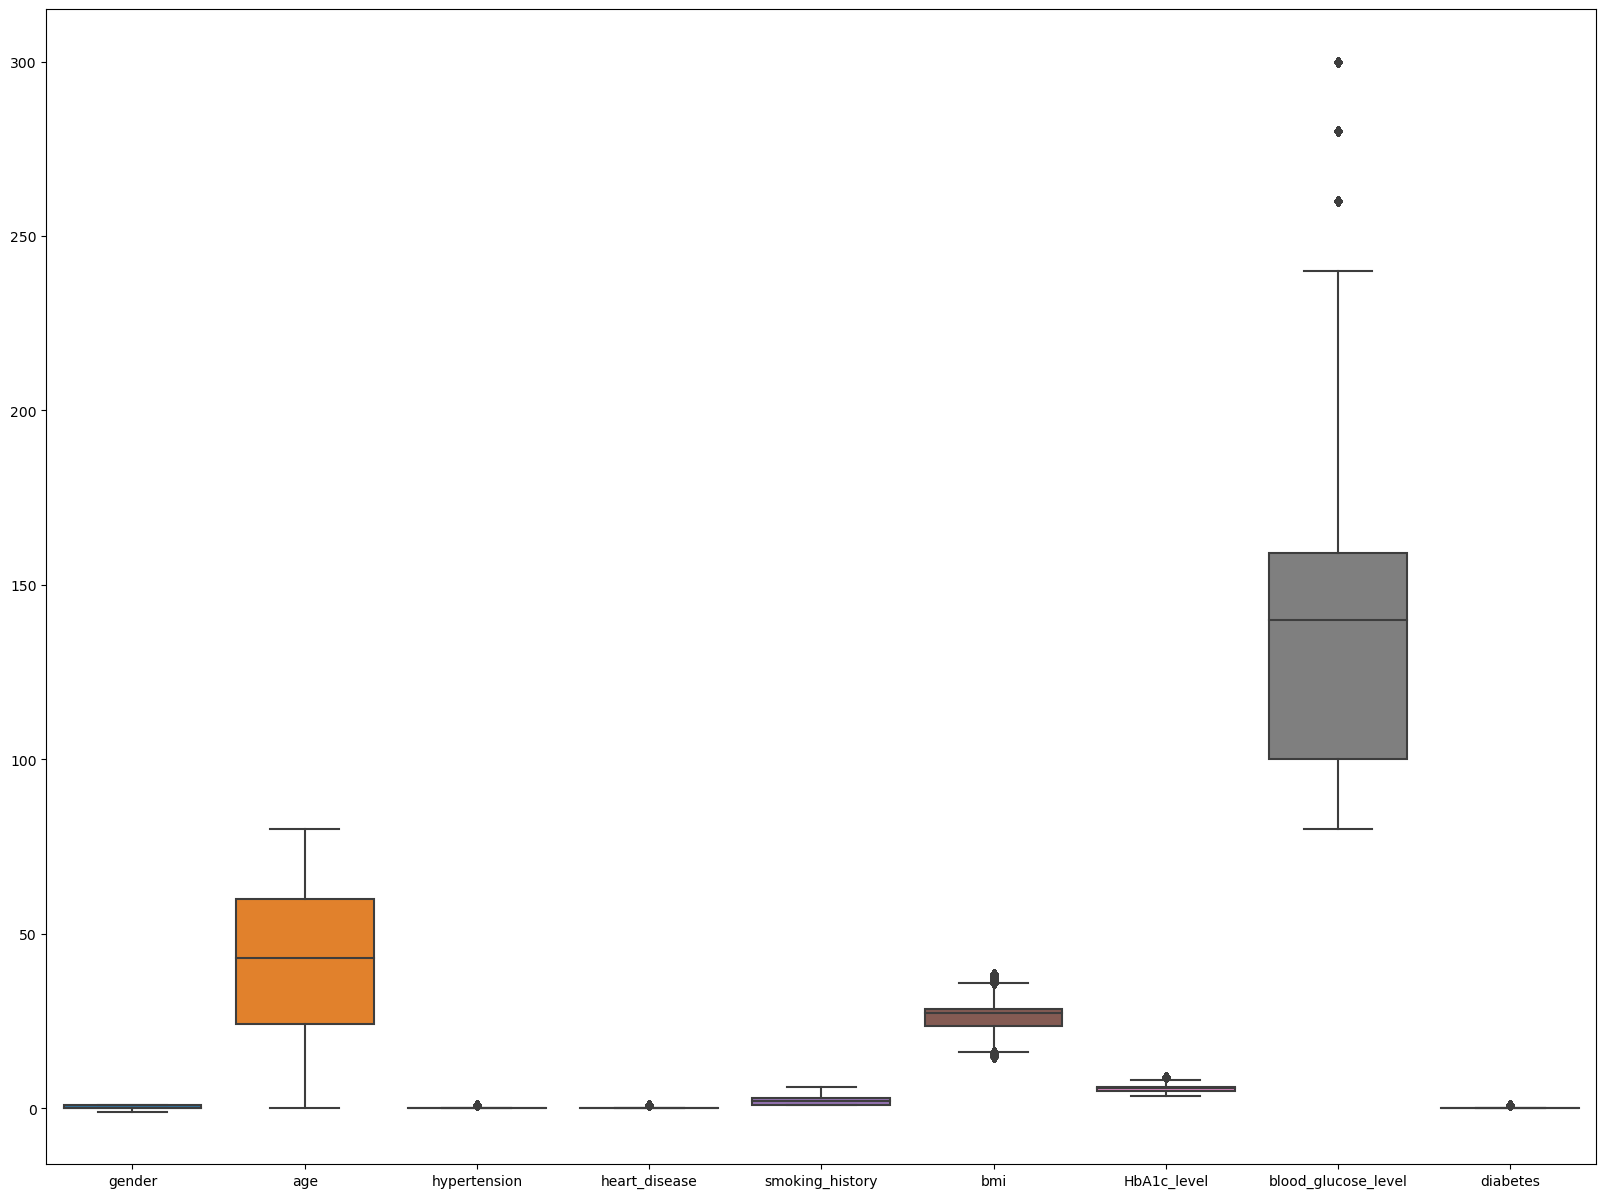

In [205]:
plt.figure(figsize = (20,15))
sns.boxplot(data=df)

#### LOGISTIC REGRESSION

In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
lr = LogisticRegression()

In [208]:
lr.fit(x_train,y_train)

LogisticRegression()

In [209]:
test = lr.score(x_test, y_test)
print("Accuracy of Logistic Regression Model is :",test*100,"%")

Accuracy of Logistic Regression Model is : 96.50582959641255 %


#### RANDOM FOREST CLASSIFIER

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
random = RandomForestClassifier()

In [212]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [213]:
rnd = random.score(x_test, y_test)
print("Accuracy of Random Forest Classifier Model is :",rnd*100,"%")

Accuracy of Random Forest Classifier Model is : 97.44215246636772 %


#### COMPARISON 

In [214]:
result={"Logistic Regression" : 96.25, "Random Forest" : 97.20, "Naive Bayes" : 90.73}
result

{'Logistic Regression': 96.25, 'Random Forest': 97.2, 'Naive Bayes': 90.73}

In [215]:
title = ["Logistic Regression", "Random Forest", "Naive Bayes"]
acc = [96.25, 97.2, 90.73]

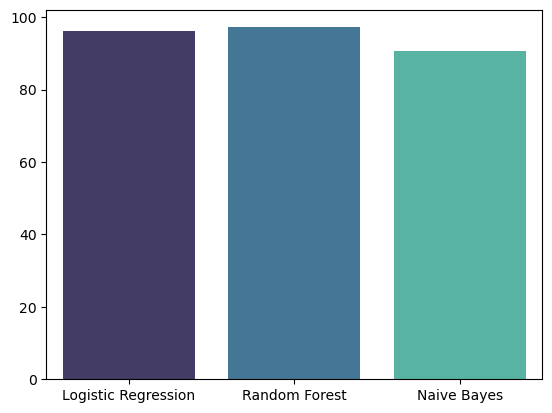

In [216]:
sns.barplot(x=title, y=acc, palette='mako')
plt.show()

In [217]:
df.to_csv("df_new.csv", columns=["gender","age","hypertension","heart_disease","smoking_history","bmi","HbA1c_level","blood_glucose_level","diabetes"])

In [218]:
new = pd.read_csv("df_new.csv")

### PREDICTIVE SYSTEM

In [219]:
input_data = (1,57,0,0,1,27.32,8.2,126)

arrayconversion = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = arrayconversion.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = lr.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\ATHARVA GOLE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

